# 01_Plot_Embeddings

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import scanpy as sc
import pandas as pd

# approximate original figure in http://spatial.libd.org/spatialLIBD/
palette_celltype={'L1':'#eb34a8',
                  'L2':'#3486eb',
                  'L3':'#34eb5b',
                  'L4':"#ae34eb",
                  'L5':'#ebdb34',
                  'L6':'#eb9234',
                  'WM':'#000000'}

palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "lightgray"

import simba as si

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/cc_envs/cc_simba_only/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
si.settings.set_figure_params(
    dpi=80,
    style='white',
    fig_size=[5,5],
    rc={'image.cmap': 'viridis'}
)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
import matplotlib.pyplot as plt

In [4]:
from benchmarking.plot import generate_umap_figures, generate_pca_figures, combine_images

# PCA

In [7]:
pca_fn = "../results/00/pca_rna/run_pca.output.tsv"

In [8]:
pca_output_df = pd.read_csv(pca_fn, sep='\t', index_col=0)

In [12]:
f"{pca_output_df.iloc[0]}/adata_CG.h5ad"

'run_pca    ../results/00/pca_rna/151675\nName: 151675, dtype: object/adata_CG.h5ad'

In [13]:
adata = sc.read_h5ad(f"{pca_output_df.iloc[0].item()}/adata_CG.h5ad")

In [17]:
adata.obsm['X_pca'].shape

(3566, 50)

In [ ]:
pca_output_df = generate_pca_figures(
    pca_output_df,
    path_col='run_pca',
    fig_path='../results/00/pca_rna/PCA',
    adata_color_col='spatialLIBD',
    fig_exts=['png', 'svg'],
    cell_embedding_adata_fn='adata_CG.h5ad'
)

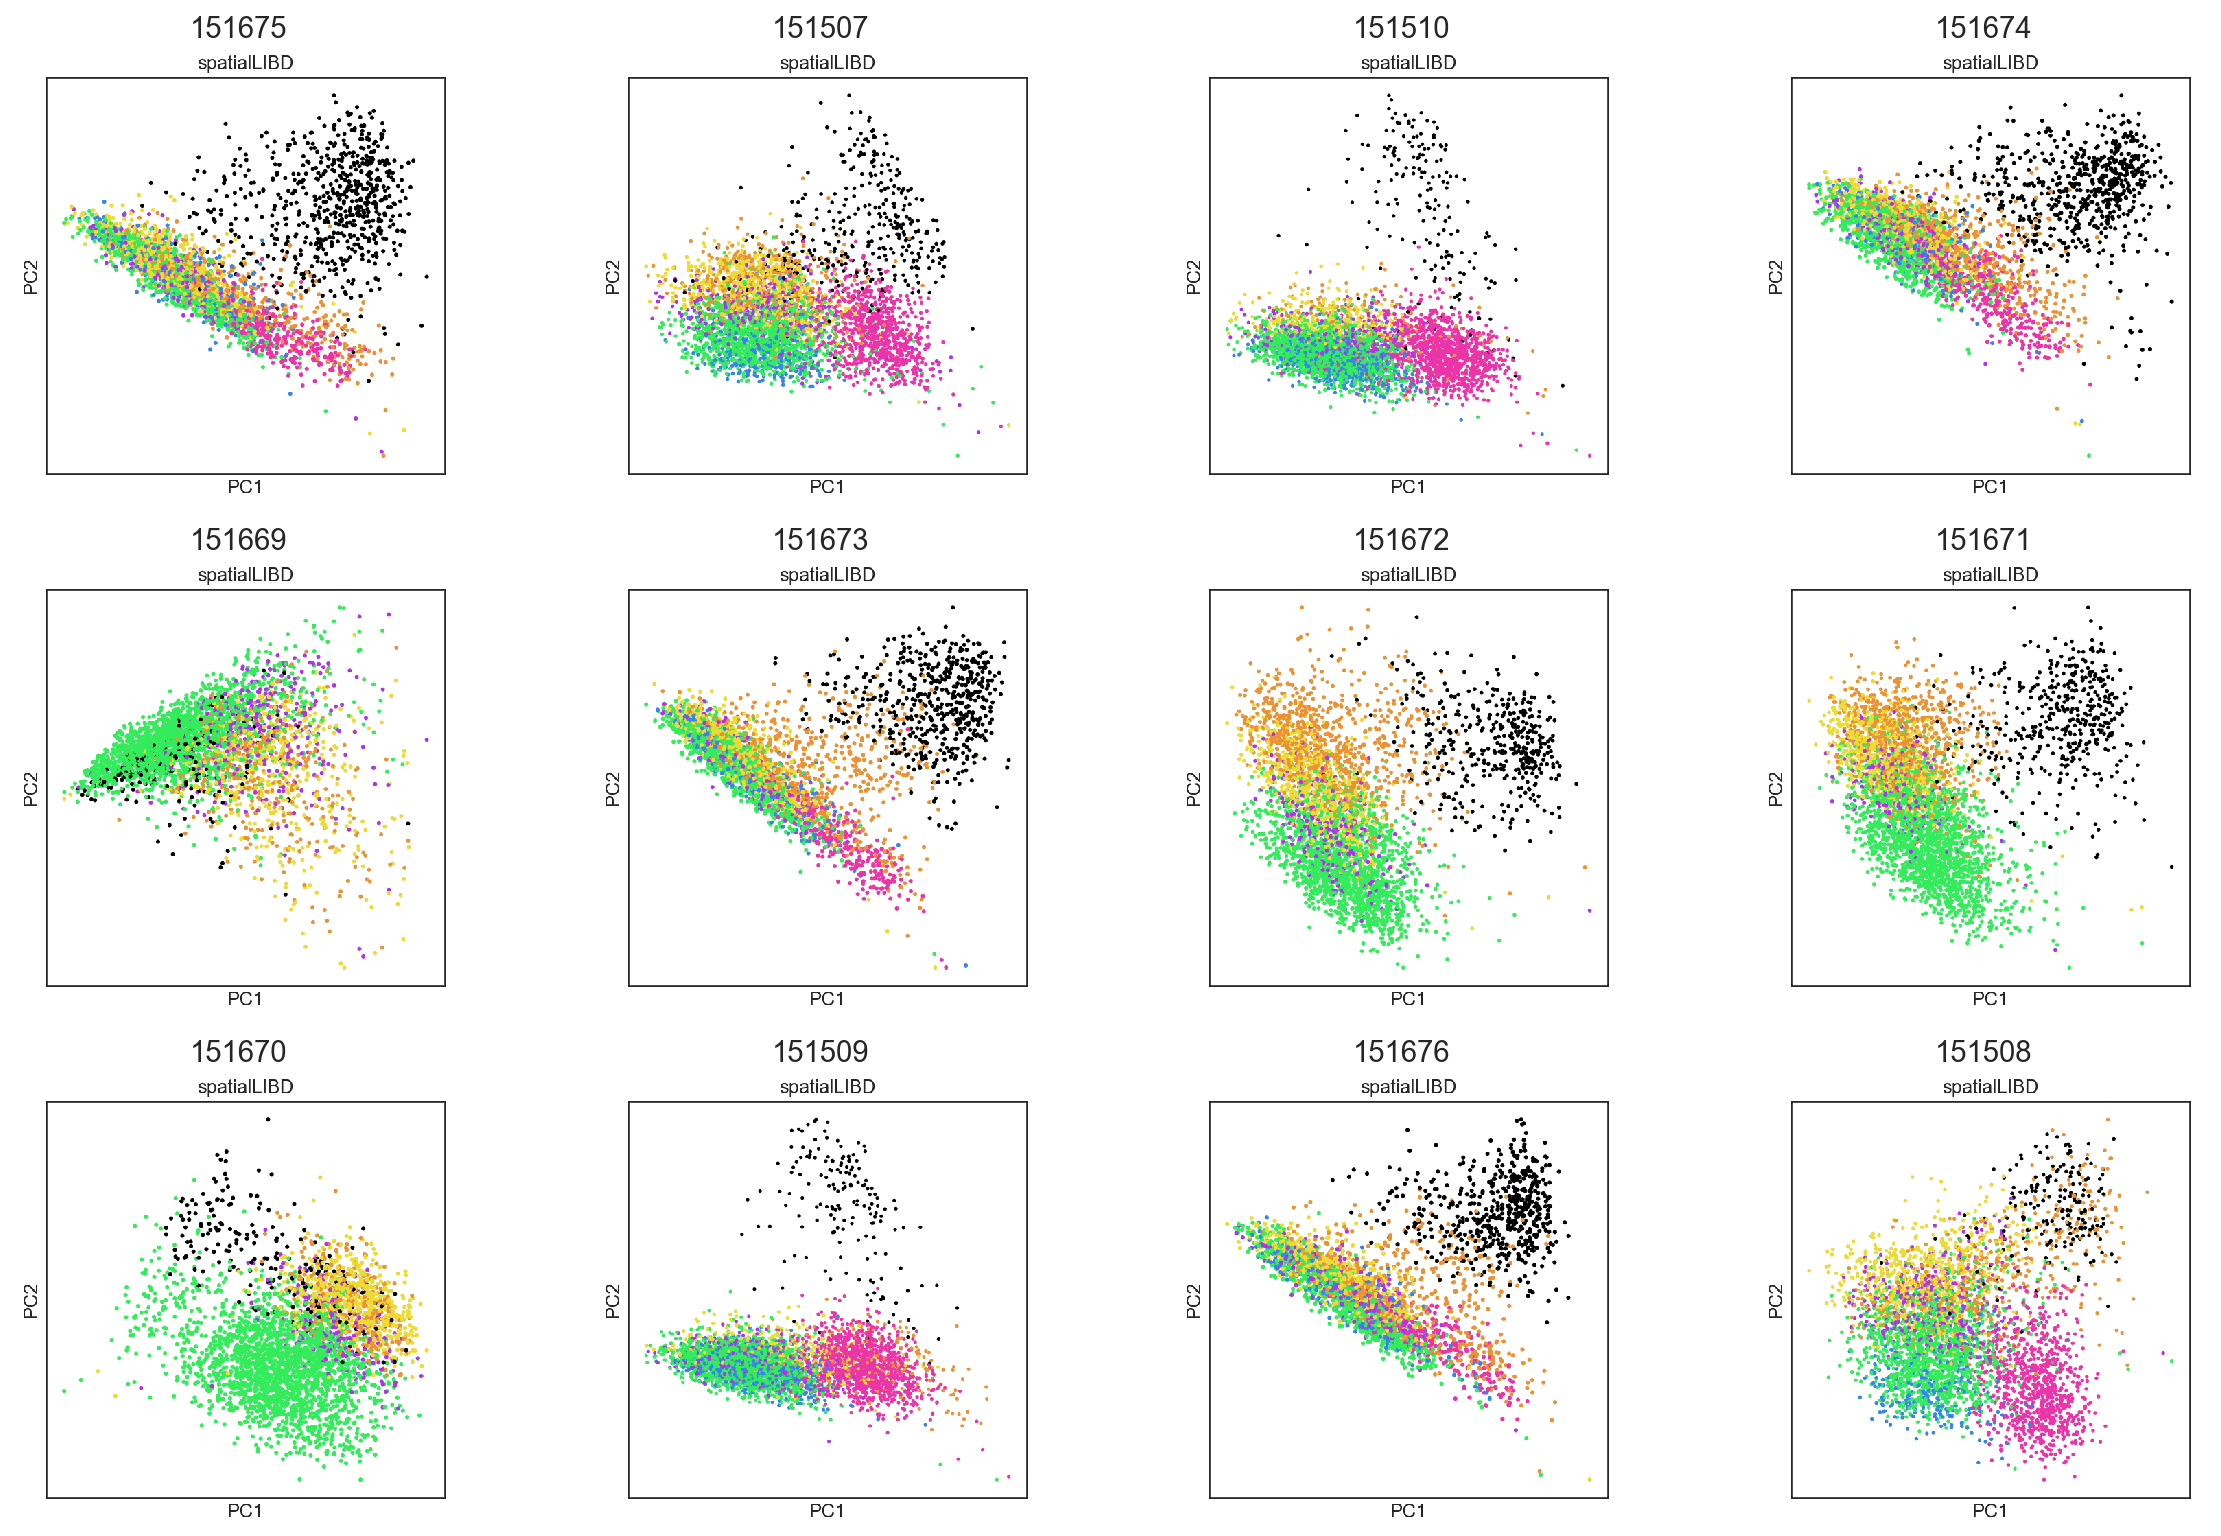

In [14]:
fig, axes = combine_images(
    pca_output_df, img_path_col='pca_fig_png',
    x_min=50,
    x_max=700,
    y_min=50,# top
    y_max=700, # bottom
)
plt.show()

# Spatial PCA

In [12]:
spatialpca_fn = '../results/00/spatialpca/spatialpca_adata_py.tsv'
spatialpca_output_df = pd.read_csv(spatialpca_fn, sep='\t', index_col=0)
spatialpca_output_df['spatialPCA_dir'] = spatialpca_output_df['spatialPCA_adata_fn'].apply(lambda x: x.rsplit("/", 1)[0])
spatialpca_output_df.head()

spatialPCA_adata_fn  \
151507  ../results/00/spatialpca/151507/spatialPCA_to_...   
151508  ../results/00/spatialpca/151508/spatialPCA_to_...   
151509  ../results/00/spatialpca/151509/spatialPCA_to_...   
151510  ../results/00/spatialpca/151510/spatialPCA_to_...   
151669  ../results/00/spatialpca/151669/spatialPCA_to_...   

                         spatialPCA_dir  
151507  ../results/00/spatialpca/151507  
151508  ../results/00/spatialpca/151508  
151509  ../results/00/spatialpca/151509  
151510  ../results/00/spatialpca/151510  
151669  ../results/00/spatialpca/151669

In [ ]:
spatialpca_output_df = generate_pca_figures(
    spatialpca_output_df,
    path_col='spatialPCA_dir',
    fig_path='../results/00/spatialpca/PCA',
    adata_color_col='spatialLIBD',
    fig_exts=['png', 'svg'],
    cell_embedding_adata_fn='spatialPCA_to_py.adata.h5ad'
)

In [16]:
spatialpca_output_df.head()

spatialPCA_adata_fn  \
151507  ../results/00/spatialpca/151507/spatialPCA_to_...   
151508  ../results/00/spatialpca/151508/spatialPCA_to_...   
151509  ../results/00/spatialpca/151509/spatialPCA_to_...   
151510  ../results/00/spatialpca/151510/spatialPCA_to_...   
151669  ../results/00/spatialpca/151669/spatialPCA_to_...   

                         spatialPCA_dir  \
151507  ../results/00/spatialpca/151507   
151508  ../results/00/spatialpca/151508   
151509  ../results/00/spatialpca/151509   
151510  ../results/00/spatialpca/151510   
151669  ../results/00/spatialpca/151669   

                                    pca_fig_png  \
151507  ../results/00/spatialpca/PCA/151507.png   
151508  ../results/00/spatialpca/PCA/151508.png   
151509  ../results/00/spatialpca/PCA/151509.png   
151510  ../results/00/spatialpca/PCA/151510.png   
151669  ../results/00/spatialpca/PCA/151669.png   

                                    pca_fig_svg  
151507  ../results/00/spatialpca/PCA/151507.svg  
151508  ../results/00/spatialpca/PCA/151508.svg  
151509  ../results/00/spatialpca/PCA/151509.svg  
151510  ../results/00/spatialpca/PCA/151510.svg  
151669  ../results/00/spatialpca/PCA/151669.svg

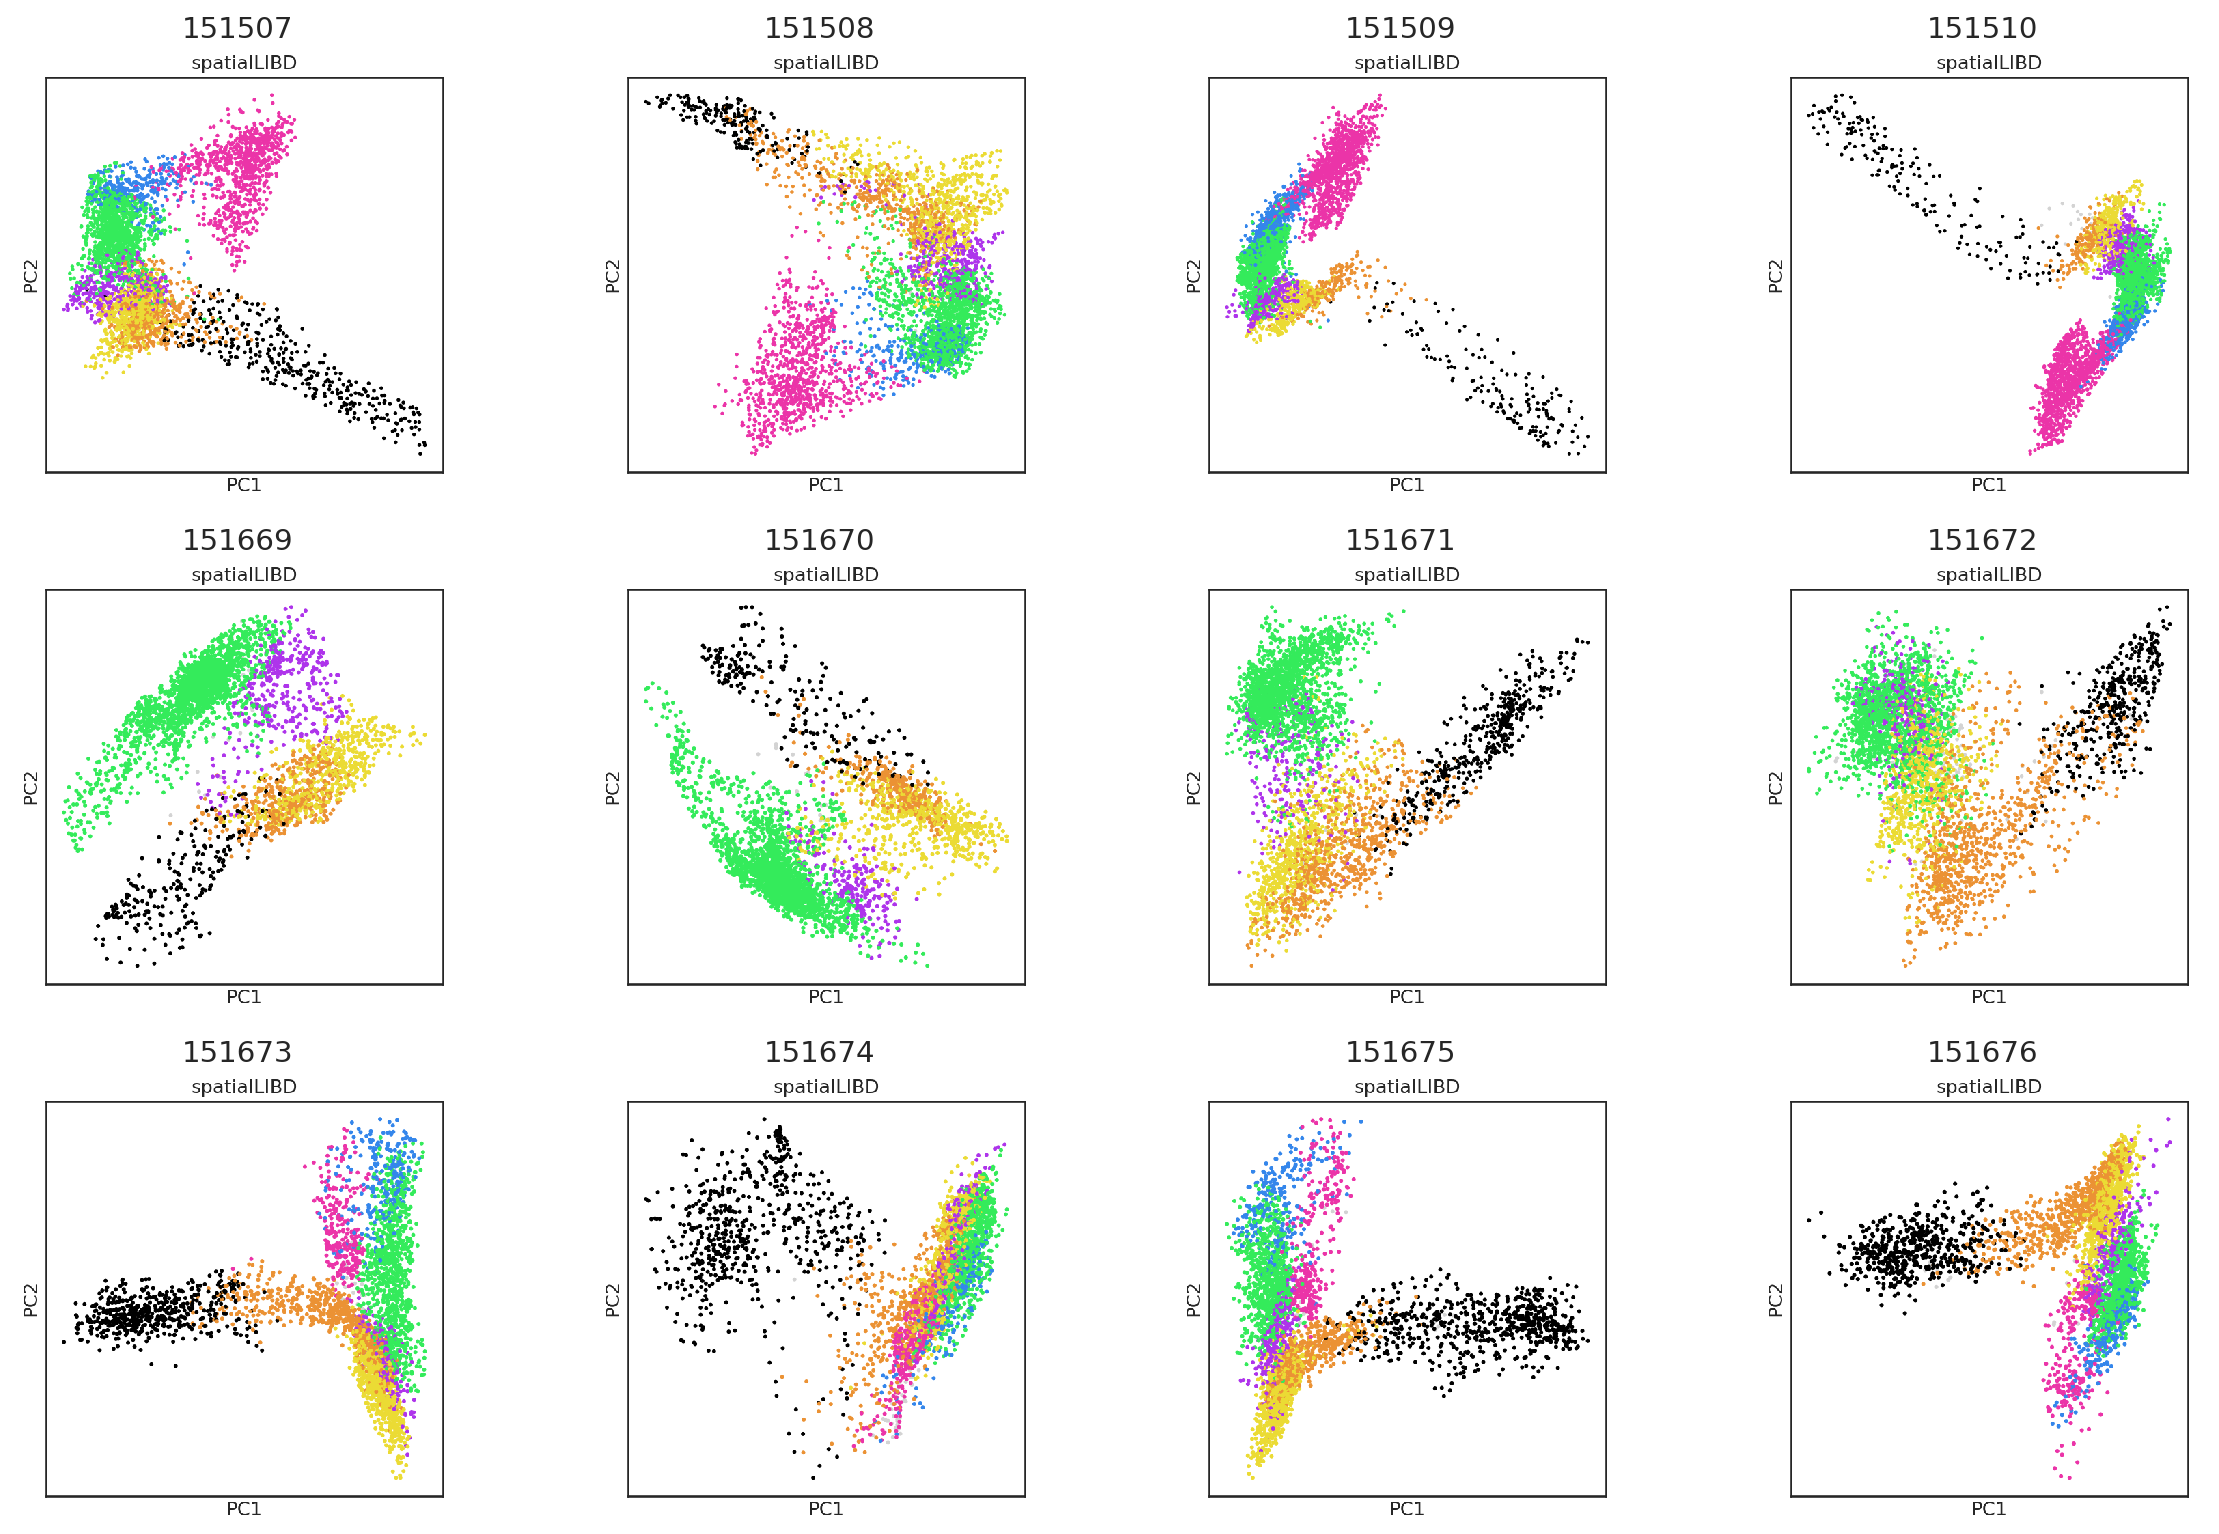

In [15]:
fig, axes = combine_images(
    spatialpca_output_df, img_path_col='pca_fig_png',
    x_min=50,
    x_max=700,
    y_min=50,# top
    y_max=700, # bottom
)
plt.show()

# SIMBA RNA only

In [16]:
simba_rna_only_output_fn = "../results/00/simba_rna_only/run_simba_rna_only.output.tsv"
simba_rna_only_output_df = pd.read_csv(simba_rna_only_output_fn, sep='\t', index_col=0)

In [17]:
simba_rna_only_output_df = generate_umap_figures(
    simba_rna_only_output_df,
    path_col='run_simba_rna_only',
    fig_path='../results/00/simba_rna_only/UMAP',
    adata_color_col='spatialLIBD',
    fig_exts=['png', 'svg'],
)

Saving results in: ../results/00/simba_rna_only/UMAP


  0%|                                                                                                     | 0/12 [00:00<?, ?it/s]/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
  8%|███████▊                                                                                     | 1/12 [00:21<03:54, 21.34s/it]/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWa

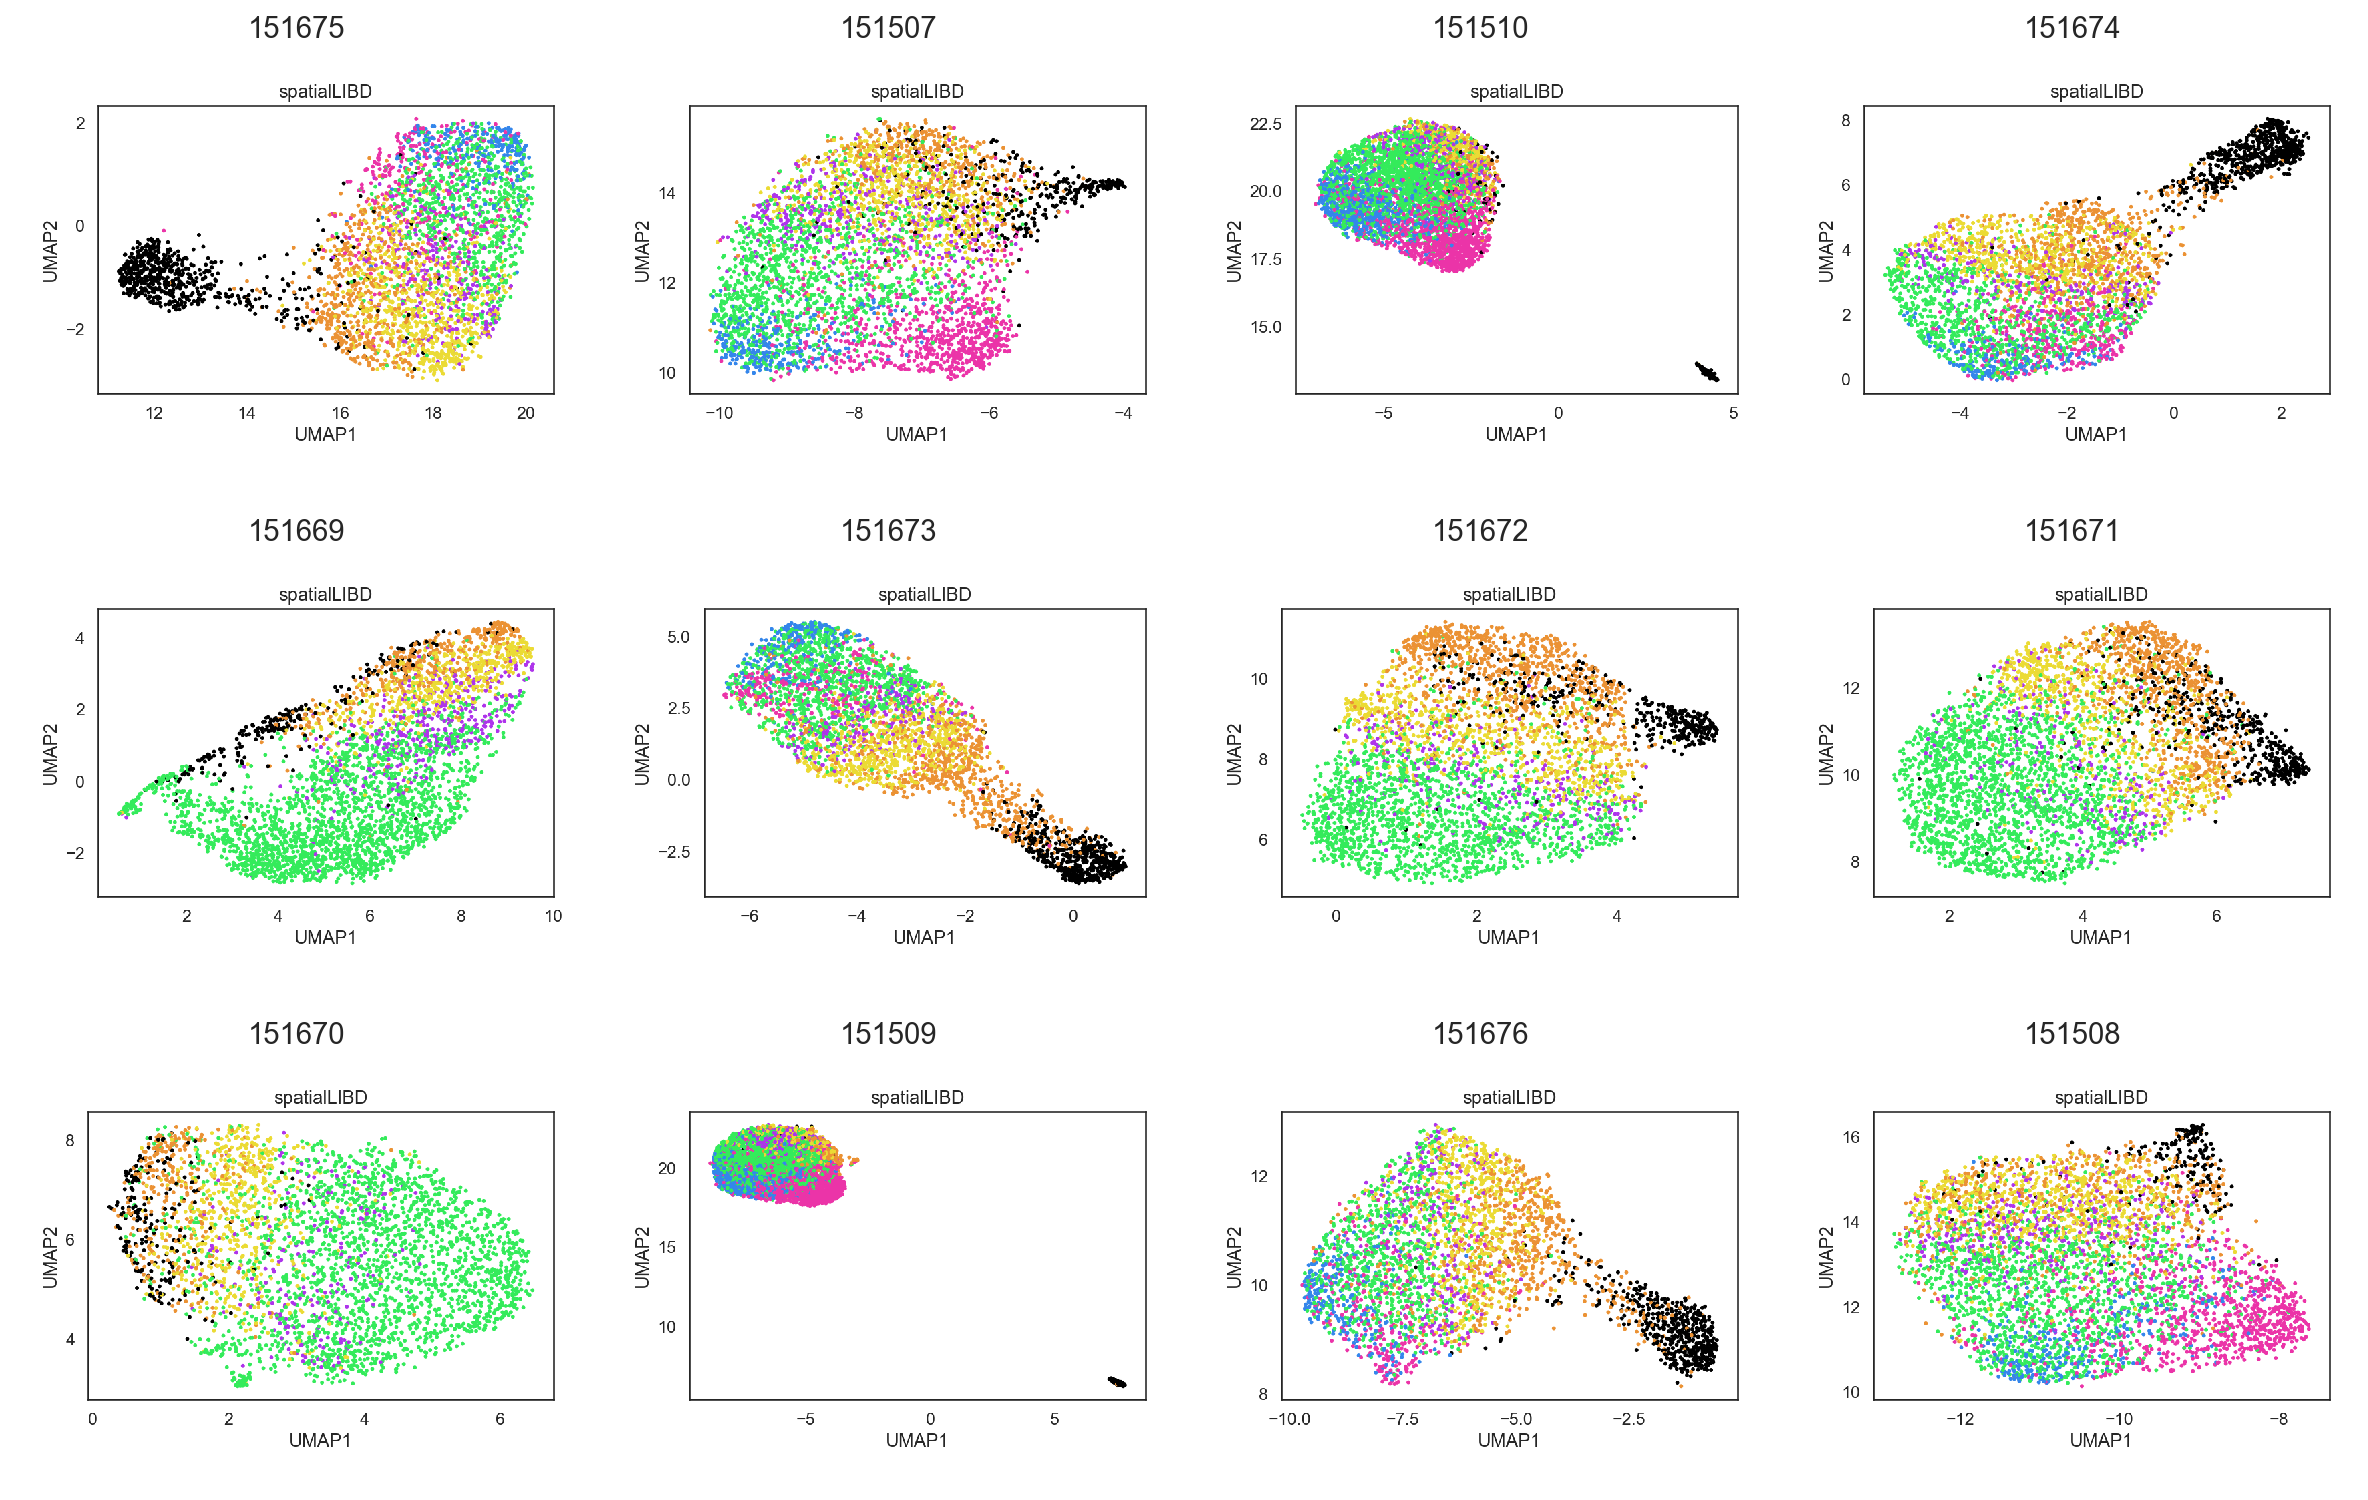

In [19]:
fig, axes = combine_images(simba_rna_only_output_df, img_path_col='umap_fig_png')
plt.show()

# SIMBA Spatial only

In [20]:
simba_spatial_output_fn = "../results/00/simba_spatial_only/run_simba_spatial_only.output.tsv"
simba_spatial_output_df = pd.read_csv(simba_spatial_output_fn, sep='\t', index_col=0)

In [21]:
simba_spatial_output_df.head()

run_simba_spatial_only
151675  ../results/00/simba_spatial_only/151675
151507  ../results/00/simba_spatial_only/151507
151510  ../results/00/simba_spatial_only/151510
151674  ../results/00/simba_spatial_only/151674
151669  ../results/00/simba_spatial_only/151669

In [24]:
simba_spatial_output_df = generate_umap_figures(
    simba_spatial_output_df,
    path_col='run_simba_spatial_only',
    fig_path='../results/00/simba_spatial_only/UMAP',
    adata_color_col='spatialLIBD',
    fig_exts=['png', 'svg'],
)

Saving results in: ../results/00/simba_spatial_only/UMAP


  0%|                                                                                                     | 0/12 [00:00<?, ?it/s]/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
  8%|███████▊                                                                                     | 1/12 [00:12<02:15, 12.35s/it]/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWa

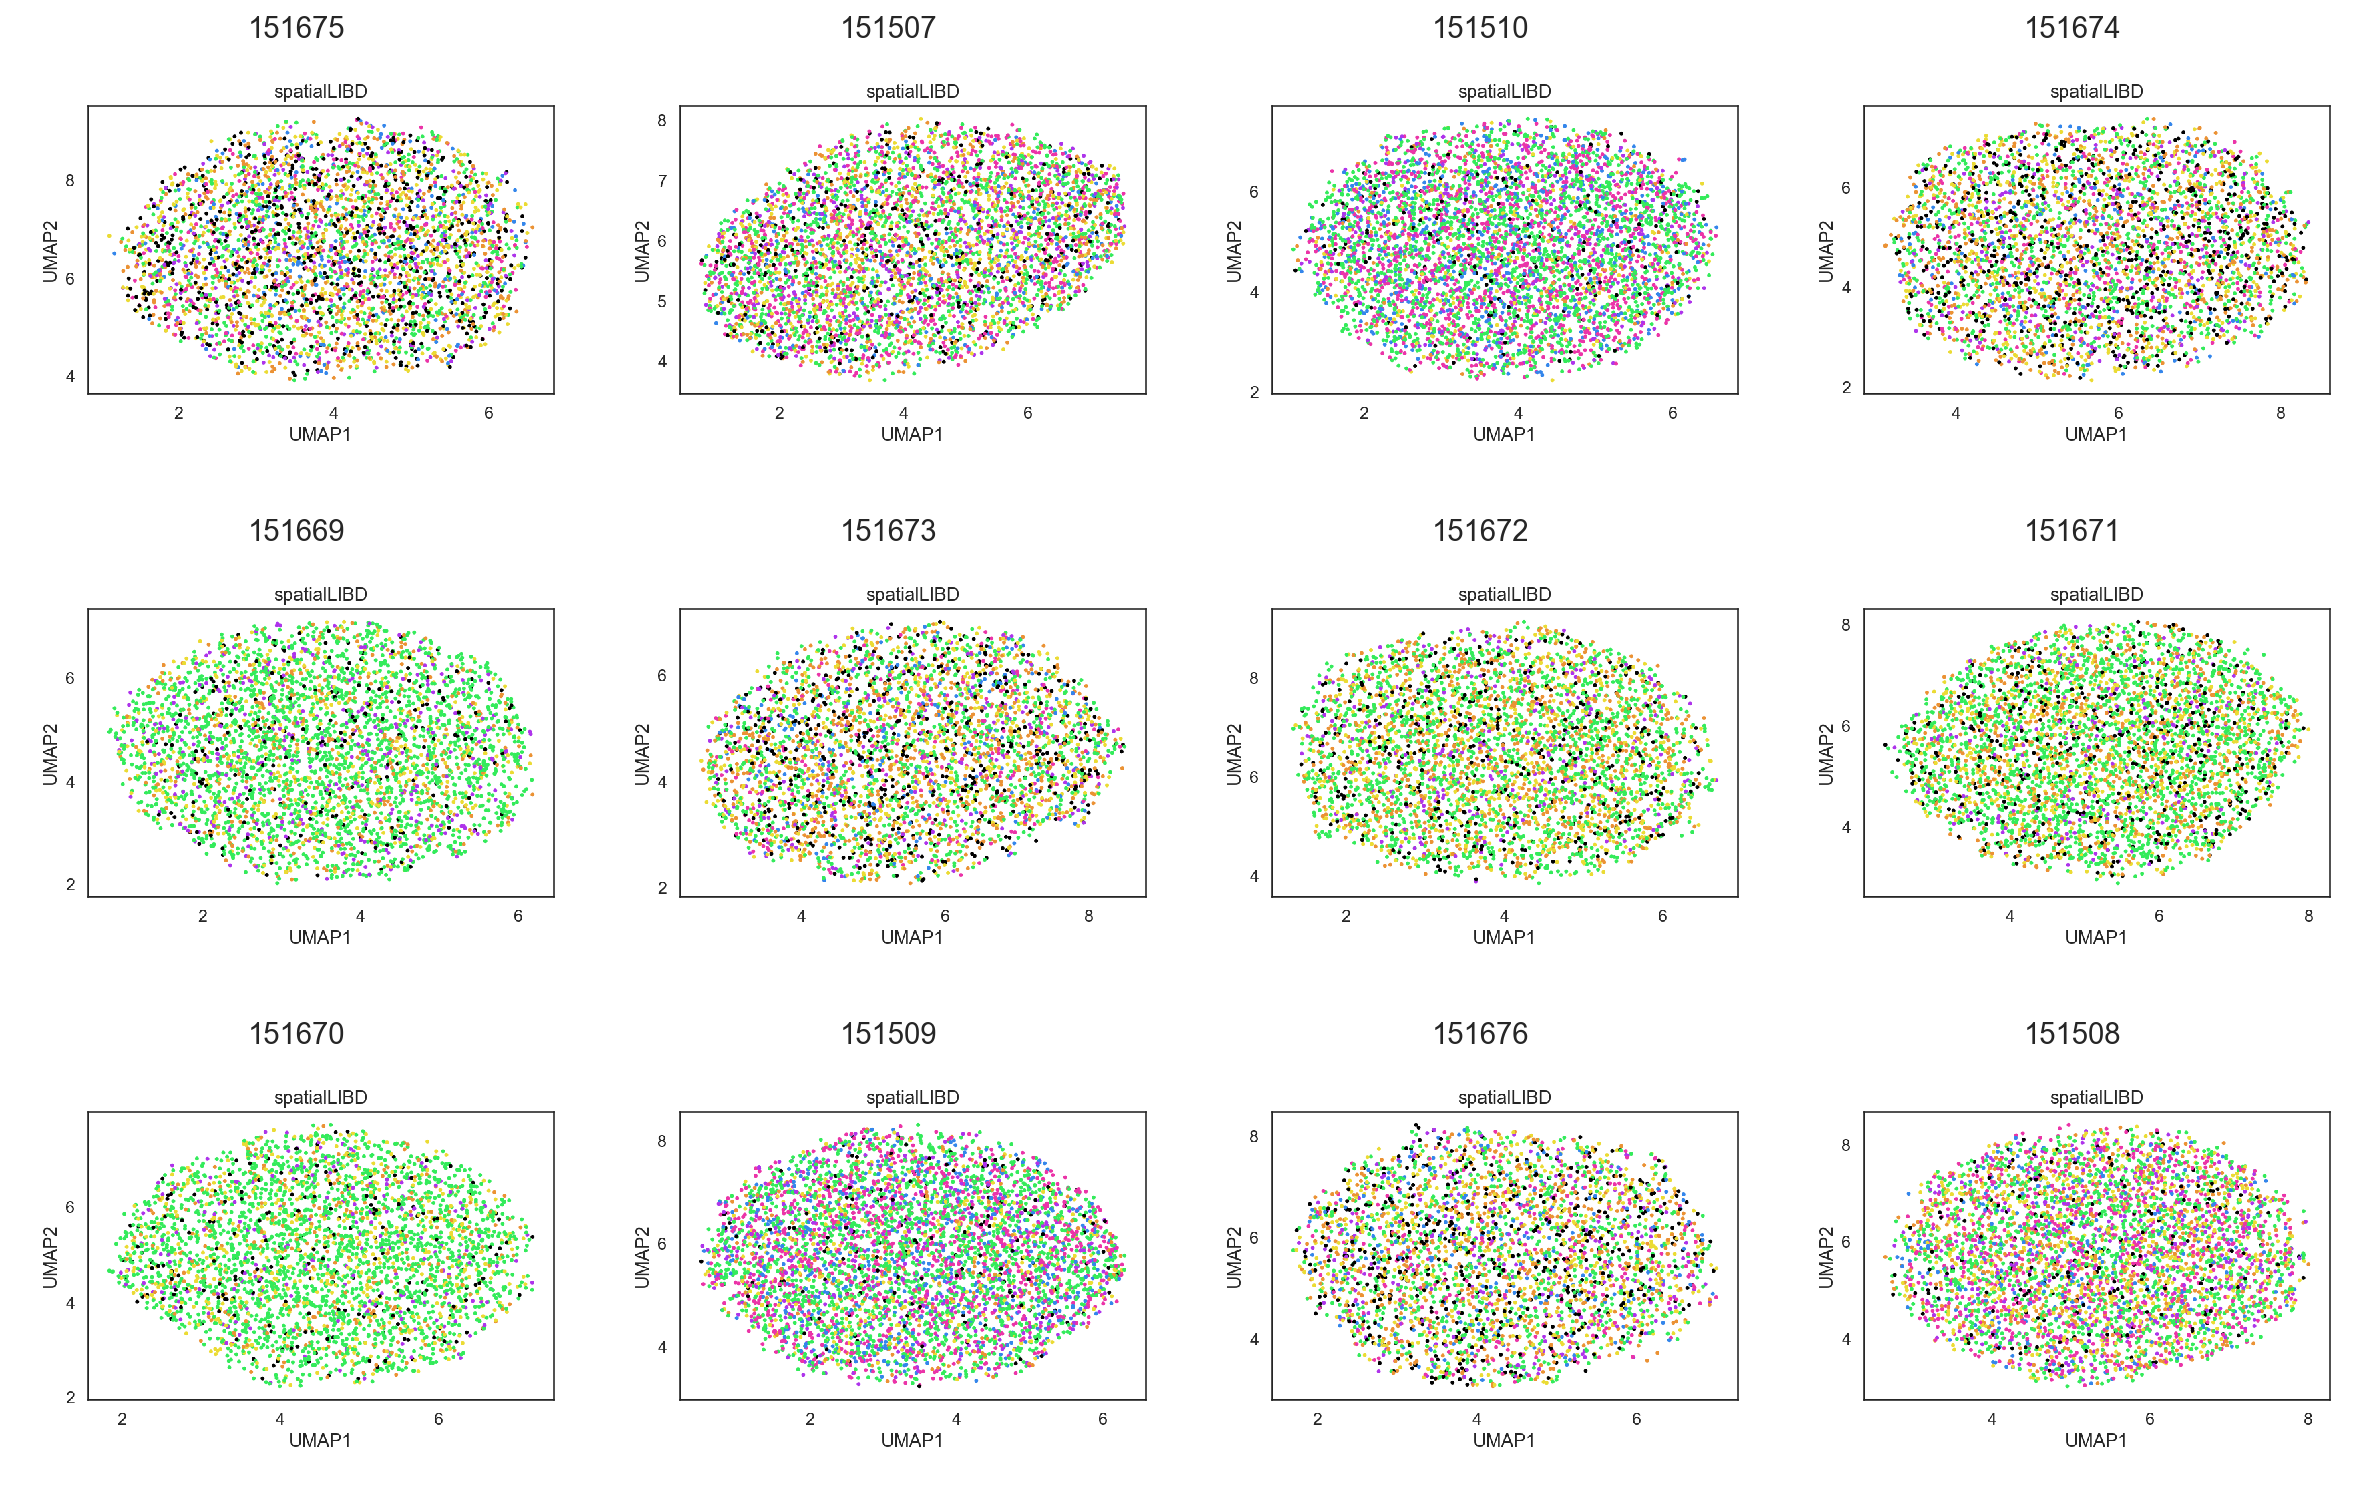

In [25]:
fig, axes = combine_images(simba_spatial_output_df, img_path_col='umap_fig_png')
plt.show()